In [57]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import imghdr
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense
from tensorflow import keras
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [4]:
# Avoid OOM Errors in GPU
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [5]:
maindir='data'
os.listdir('data')

['happy', 'sad']

In [6]:
image_extns=['jpeg','png','bmp','jpg']

In [7]:
for image_class in os.listdir(maindir):
    for image in os.listdir(os.path.join(maindir,image_class)):
        image_path=os.path.join(maindir,image_class,image)
        try:
            img=cv2.imread('image_path')
            isvalid=imghdr.what(image_path)
            if isvalid not in image_extns:
                print(f'{image_path} not in extension list')
                os.remove(image_path)
        except Exception as e:
            print(f'Issue with image {image_path}')

In [8]:
data=tf.keras.utils.image_dataset_from_directory(maindir)

Found 298 files belonging to 2 classes.


In [10]:
data_iterator=data.as_numpy_iterator()
batch=data_iterator.next()
len(batch)

2

In [13]:
batch[0].shape

(32, 256, 256, 3)

In [20]:
batch[0].max()

255.0

In [12]:
batch[1]

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1])

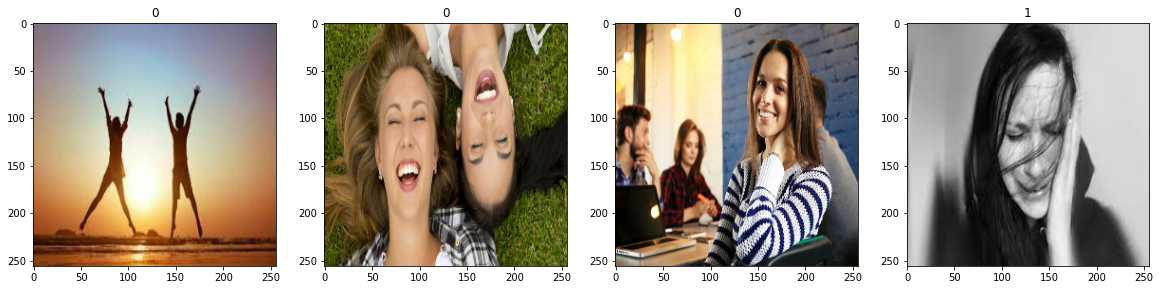

In [17]:
fig,ax=plt.subplots(nrows=1,ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
plt.show()

1: Sad class

0: Happy class

In [19]:
class_labels=['Happy','Sad']

In [21]:
data=data.map(lambda x,y:(x/255,y))

In [27]:
data_iterator=data.as_numpy_iterator()
batch=data_iterator.next()
batch[0].max()

1.0

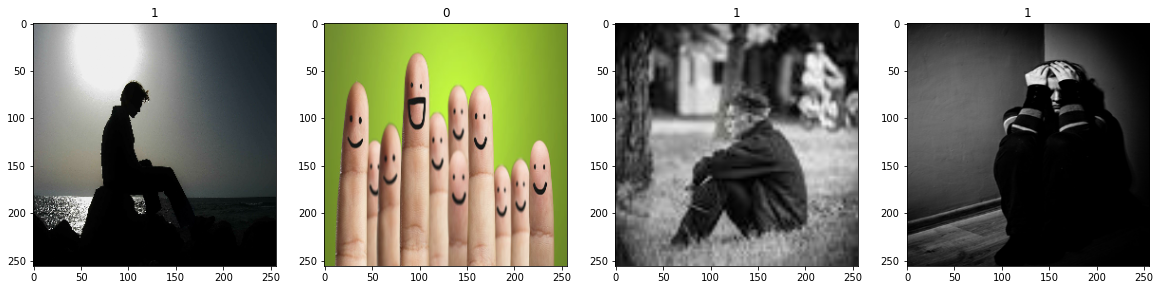

In [28]:
fig,ax=plt.subplots(nrows=1,ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])
plt.show()

In [35]:
len(data)

10

In [36]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)
print(len(train),len(val),len(test))

7 2 1


In [38]:
model=Sequential()

In [40]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3),padding='same'))
model.add(MaxPool2D())

model.add(Conv2D(32,(3,3),1,activation='relu',padding='same'))
model.add(MaxPool2D())

model.add(Conv2D(16,(3,3),1,activation='relu',padding='same'))
model.add(MaxPool2D())

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 16)       0

In [45]:
model.compile(loss=keras.losses.BinaryCrossentropy(),metrics=['accuracy'],optimizer=keras.optimizers.Adam())

In [46]:
logsdir='logs'
tf_callbacks=keras.callbacks.TensorBoard(log_dir=logsdir)

In [47]:
history=model.fit(train,epochs=20,validation_data=val,callbacks=[tf_callbacks])

Epoch 1/20
7/7 [==============================] - 18s 2s/step - loss: 0.8944 - accuracy: 0.4866 - val_loss: 0.6884 - val_accuracy: 0.4062
Epoch 2/20
7/7 [==============================] - 16s 2s/step - loss: 0.6582 - accuracy: 0.5580 - val_loss: 0.6276 - val_accuracy: 0.6406
Epoch 3/20
7/7 [==============================] - 17s 2s/step - loss: 0.5862 - accuracy: 0.7812 - val_loss: 0.4752 - val_accuracy: 0.8125
Epoch 4/20
7/7 [==============================] - 16s 2s/step - loss: 0.4755 - accuracy: 0.7812 - val_loss: 0.5437 - val_accuracy: 0.7031
Epoch 5/20
7/7 [==============================] - 15s 2s/step - loss: 0.4909 - accuracy: 0.7455 - val_loss: 0.4044 - val_accuracy: 0.8281
Epoch 6/20
7/7 [==============================] - 15s 2s/step - loss: 0.4482 - accuracy: 0.8036 - val_loss: 0.6040 - val_accuracy: 0.7656
Epoch 7/20
7/7 [==============================] - 15s 2s/step - loss: 0.4351 - accuracy: 0.7946 - val_loss: 0.3320 - val_accuracy: 0.8594
Epoch 8/20
7/7 [==================

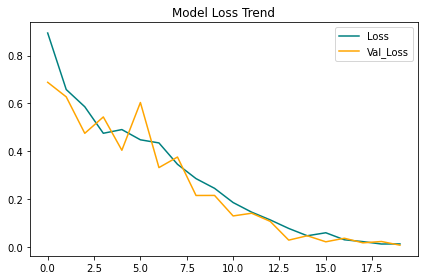

In [49]:
plt.plot(history.history['loss'],color='teal',label='Loss')
plt.plot(history.history['val_loss'],color='orange',label='Val_Loss')
plt.title('Model Loss Trend')
plt.legend()
plt.tight_layout()
plt.show()

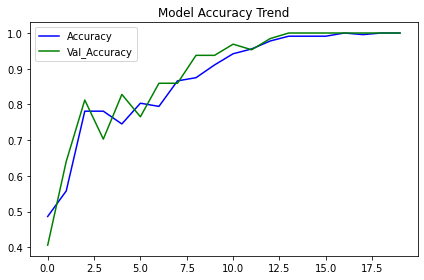

In [50]:
plt.plot(history.history['accuracy'],color='blue',label='Accuracy')
plt.plot(history.history['val_accuracy'],color='green',label='Val_Accuracy')
plt.title('Model Accuracy Trend')
plt.legend()
plt.tight_layout()
plt.show()

In [52]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [55]:
for batch in test.as_numpy_iterator():
    images,labels=batch
    preds=model.predict(images)
    pre.update_state(labels,preds)
    re.update_state(labels,preds)
    acc.update_state(labels,preds)

1/1 [==============================] - 0s 282ms/step


In [56]:
print(f'Presion: {pre.result()}')
print(f'Recall: {re.result()}')
print(f'Accuracy: {acc.result()}')

Presion: 1.0
Recall: 1.0
Accuracy: 1.0


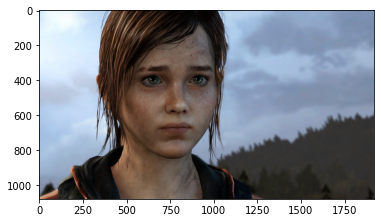

(256, 256, 3)


In [124]:
img=cv2.imread('556876.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
resizeimg=tf.image.resize(img,(256,256))
print(resizeimg.shape)

In [125]:
resizeimg=np.expand_dims(resizeimg/255,0)
resizeimg.shape

(1, 256, 256, 3)

In [126]:
pred=model.predict(resizeimg)
pred=pred[0].item()
if pred>=.5:
    pred=1
else:
    pred=0
print(num_class[pred])

1/1 [==============================] - 0s 56ms/step
Sad


In [127]:
model.save(os.path.join('models','emotion_model.h5'))